In [4]:
import requests
from bs4 import BeautifulSoup

In [5]:
brand=[]
description=[]
price=[]
offer=[]
reviews1=[]
free_coupon=[]
coupon=[]

In [6]:
import re
import numpy as np

In [11]:
import requests
from bs4 import BeautifulSoup
import time
import random

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

for i in range(1, 115):
    url = f"https://www.nykaa.com/makeup/lips/c/15?page_no={i}&sort=popularity&search_redirection=True&eq=desktop"
    try:
        page = requests.get(url, headers=headers, timeout=10)
        time.sleep(random.uniform(1, 3)) 
        page.raise_for_status()  # Raise an error for bad responses (4xx and 5xx)
        soup = BeautifulSoup(page.text, "html.parser")
        
        for j in soup.find_all("div", class_="css-ifdzs8"):
             # brand
            b=j.find("div",class_="css-xrzmfa").text
            reg_ex1=re.findall(r"\w+\s\w+\s",b)
            if len(reg_ex1)>0:
                brand.append(reg_ex1[0])
            else:
                brand.append(np.nan)
    
            #description
            d=j.find("div",class_="css-xrzmfa").text
            reg_ex2=re.findall(r"^\S+(?:\s\S+)?\s(.*)",d)
            if len(reg_ex2)>0:
                description.append(reg_ex2[0])
            else:
                description.append(np.nan)
    
            #price and discount
            
            #for k in soup.find_all("div",class_="css-1d0jf8e"):
                #price
            p=j.find("span",class_="css-17x46n5")
            #reg1=re.findall(r"₹\d+",p)
            #if len(reg1)>0:
               # price.append(reg1[0])
            if p:
                price.append(p.text)
                
            #offer
            off=j.find("span",class_="css-cjd9an")
            if off:
                offer.append(off.text)
            else:
                offer.append(np.nan)
    
            #reviews
            r=j.find("span",class_="css-1qbvrhp")
            if r:
                reviews1.append(r.text)
            else:
                reviews1.append(np.nan)
    
            # free_coupon
            f=j.find("li",class_="custom-tag css-1bse542")
            if f:
                free_coupon.append("Yes")
            else:
                free_coupon.append("No")

            #coupon
            c=j.find("p",class_="css-1kzcg63")
            if c:
                coupon.append("Free gift")
            else:
                coupon.append(np.nan)

    except requests.exceptions.RequestException as e:
        print(f"Error fetching page {i}: {e}")


In [13]:
brand

['Maybelline New ',
 'Nykaa Matte ',
 'Airy Velvet ',
 'C MACximal ',
 'Charlotte Tilbury ',
 'Huda Beauty ',
 'Swiss Beauty ',
 'MARS Creamy ',
 'Blue Heaven ',
 'ColourPop Lippie ',
 'Lakme Forever ',
 'Nykaa Cosmetics ',
 'LOreal Paris ',
 'Kay Beauty ',
 'Maybelline Color ',
 'Nykaa All ',
 'Swiss Beauty ',
 'Maybelline New ',
 'SUGAR Matte ',
 'Lakme Forever ',
 'Oreal Paris ',
 'SUGAR Matte ',
 'Absolu Rouge ',
 'Clinique Almost ',
 't Smudge ',
 'Earth Rhythm ',
 'Nykaa Perfumery ',
 'Insight Cosmetics ',
 'Elle 18 ',
 'C Powder ',
 'Maybelline New ',
 'Revlon Super ',
 'Insight Cosmetics ',
 'Smashbox Always ',
 'SUGAR Partner ',
 'Cosmetics Glow ',
 'Kay Beauty ',
 'Praush Plush ',
 'Lakme Superglow ',
 'Cosmetics Lip ',
 'Charlotte Tilbury ',
 'SUGAR Matte ',
 'Bobbi Brown ',
 'Nykaa Cosmetics ',
 'Nykaa Perfumery ',
 'Huda Beauty ',
 'KIRO Four ',
 'Key Ceramide ',
 'Faces Canada ',
 'Bobbi Brown ',
 'Swiss Beauty ',
 'Stop Airy ',
 'Swiss Beauty ',
 'Swiss Beauty ',
 'Staze

In [15]:
len(brand)

3280

In [17]:
description

['York Super Stay Vinyl Ink Liquid Lipstick, In...',
 'To Last ! Transferproof Liquid Lipstick',
 'Velvet Matte Lip Mousse',
 'Matte Lipstick',
 'Matte Revolution',
 'Power Bullet Matte Lipstick',
 'My Shine High Pigmented & Long-Lasting Lipstick...',
 'Matte Lipstick',
 '2 - In - 1 Clear & Tinted Lip Gloss',
 'Stix',
 'Matte Lipstick, Made With French Rose Oil Extr...',
 'So Creme! Creamy Matte Lipstick',
 'Infallible Matte Resistance Lipstick, Transfer ...',
 'Hydra Creme Lipstick',
 'Sensational Creamy Matte Lipstick, 12H Form...',
 'Day Matte Long Lasting Transferproof Liquid Lipsti...',
 'Bold Matte Lip Liner Pencil',
 'York Super Stay Matte Ink Liquid Lipstick, La...',
 'Attack Transferproof Lipstick',
 'Matte Liquid Lip Color, 16Hr Lipstick, Lightwe...',
 'Color Riche Satin Lipstick',
 'As Hell Crayon Lipstick With Free Sharpener',
 'Absolu Rouge Drama Matte Non-Smudge Long-Stay Lip...',
 'Lipstick In Black Honey (Lip Balm)',
 "Smudge Won't Budge Lip Crayon",
 'Lip & Cheek Tint'

In [19]:
len(description)

3280

In [21]:
price

['MRP:',
 'MRP:₹675',
 'MRP:₹900',
 'MRP:',
 'MRP:',
 'MRP:',
 'MRP:₹349',
 'MRP:₹199',
 'MRP:₹249',
 'MRP:',
 'MRP:₹349',
 'MRP:₹329',
 'MRP:',
 'MRP:',
 'MRP:',
 'MRP:₹399',
 'MRP:',
 'MRP:',
 'MRP:₹749',
 'MRP:₹429',
 'MRP:',
 'MRP:₹899',
 'MRP:',
 'MRP:',
 'MRP:₹279',
 'MRP:₹499',
 'MRP:',
 'MRP:₹295',
 'MRP:₹110',
 'MRP:',
 'MRP:',
 'MRP:₹999',
 'MRP:₹100',
 'MRP:',
 'MRP:₹699',
 'MRP:',
 'MRP:',
 'MRP:₹650',
 'MRP:₹350',
 'MRP:',
 'MRP:',
 'MRP:₹599',
 'MRP:',
 'MRP:',
 'MRP:₹799',
 'MRP:',
 'MRP:₹1175',
 'MRP:₹295',
 'MRP:₹325',
 'MRP:',
 'MRP:₹399',
 'MRP:₹875',
 'MRP:₹399',
 'MRP:₹249',
 'MRP:₹449',
 'MRP:₹249',
 'MRP:',
 'MRP:₹469',
 'MRP:',
 'MRP:₹690',
 'MRP:',
 'MRP:',
 'MRP:₹750',
 'MRP:₹899',
 'MRP:',
 'MRP:',
 'MRP:₹229',
 'MRP:₹349',
 'MRP:',
 'MRP:₹575',
 'MRP:₹1100',
 'MRP:',
 'MRP:',
 'MRP:',
 'MRP:',
 'MRP:',
 'MRP:₹950',
 'MRP:₹595',
 'MRP:',
 'MRP:₹650',
 'MRP:₹3300',
 'MRP:',
 'MRP:₹379',
 'MRP:',
 'MRP:₹299',
 'MRP:₹350',
 'MRP:',
 'MRP:₹399',
 'MRP:₹449',
 'MR

In [23]:
len(price)

3280

In [25]:
offer

[nan,
 '20% Off',
 '20% Off',
 nan,
 nan,
 nan,
 '10% Off',
 '2% Off',
 '25% Off',
 nan,
 '15% Off',
 '15% Off',
 nan,
 nan,
 nan,
 '20% Off',
 nan,
 nan,
 '20% Off',
 '10% Off',
 nan,
 '10% Off',
 nan,
 nan,
 '4% Off',
 '20% Off',
 nan,
 '5% Off',
 '5% Off',
 nan,
 nan,
 '10% Off',
 '5% Off',
 nan,
 '5% Off',
 nan,
 nan,
 '5% Off',
 '10% Off',
 nan,
 nan,
 '40% Off',
 nan,
 nan,
 '20% Off',
 nan,
 '5% Off',
 '16% Off',
 '25% Off',
 nan,
 '13% Off',
 '5% Off',
 '10% Off',
 '10% Off',
 '12% Off',
 '4% Off',
 nan,
 '10% Off',
 nan,
 '10% Off',
 nan,
 nan,
 '10% Off',
 '5% Off',
 nan,
 nan,
 '21% Off',
 '3% Off',
 nan,
 '10% Off',
 '10% Off',
 nan,
 nan,
 nan,
 nan,
 nan,
 '10% Off',
 '5% Off',
 nan,
 '10% Off',
 '15% Off',
 nan,
 '5% Off',
 nan,
 '9% Off',
 '15% Off',
 nan,
 '10% Off',
 '20% Off',
 '5% Off',
 '10% Off',
 '15% Off',
 '55% Off',
 '10% Off',
 nan,
 '3% Off',
 '20% Off',
 nan,
 nan,
 nan,
 '22% Off',
 '22% Off',
 '8% Off',
 '12% Off',
 '5% Off',
 '10% Off',
 '7% Off',
 '55% 

In [27]:
len(offer)

3280

In [29]:
reviews1

['( 37910 )',
 '( 77471 )',
 '( 9703 )',
 '( 8803 )',
 '( 4688 )',
 '( 6732 )',
 '( 1351 )',
 '( 24518 )',
 nan,
 '( 1249 )',
 '( 43195 )',
 '( 173350 )',
 '( 6467 )',
 '( 3655 )',
 '( 157258 )',
 '( 53139 )',
 '( 138294 )',
 '( 111633 )',
 '( 23898 )',
 '( 124402 )',
 '( 211 )',
 '( 19464 )',
 '( 72 )',
 '( 2070 )',
 '( 19881 )',
 '( 24284 )',
 '( 133 )',
 '( 20440 )',
 '( 70950 )',
 '( 3668 )',
 '( 20891 )',
 '( 7051 )',
 '( 58618 )',
 '( 4252 )',
 '( 169 )',
 '( 602 )',
 '( 4974 )',
 '( 8019 )',
 '( 14 )',
 '( 26270 )',
 '( 638 )',
 '( 1853 )',
 '( 3616 )',
 '( 62 )',
 '( 15312 )',
 '( 659 )',
 '( 1050 )',
 '( 7703 )',
 '( 41939 )',
 '( 694 )',
 '( 10312 )',
 '( 3789 )',
 '( 30403 )',
 '( 31353 )',
 '( 4545 )',
 '( 2547 )',
 '( 2623 )',
 '( 20652 )',
 '( 285 )',
 '( 1397 )',
 '( 455 )',
 '( 31389 )',
 '( 469 )',
 '( 2272 )',
 '( 100 )',
 '( 241 )',
 '( 1011 )',
 '( 8896 )',
 '( 31769 )',
 '( 291 )',
 '( 1203 )',
 '( 182 )',
 '( 33 )',
 '( 17 )',
 '( 22 )',
 '( 358 )',
 '( 1192 )',
 

In [31]:
len(reviews1)

3280

In [34]:
free_coupon

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No'

In [36]:
len(free_coupon)

3280

In [38]:
coupon

[nan,
 nan,
 nan,
 'Free gift',
 'Free gift',
 nan,
 'Free gift',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Free gift',
 nan,
 'Free gift',
 nan,
 nan,
 'Free gift',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Free gift',
 nan,
 'Free gift',
 nan,
 nan,
 'Free gift',
 nan,
 'Free gift',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Free gift',
 'Free gift',
 'Free gift',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Free gift',
 'Free gift',
 nan,
 'Free gift',
 'Free gift',
 'Free gift',
 nan,
 'Free gift',
 'Free gift',
 nan,
 nan,
 nan,
 'Free gift',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Free gift',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Free gift',
 'Free gift',
 nan,
 'Free gift',
 'Free gift',
 nan,
 'Free gift',
 nan,
 nan,
 nan,
 'Free gift',
 nan,
 nan,
 'Free gift',
 'Free gift',
 nan,
 'Free gift',
 nan,
 'Free gift',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Free gift',
 nan,
 nan,
 'Free gift',
 'Free gift',
 'Free gift',
 nan

In [40]:
len(coupon)

3280

In [42]:
import pandas as pd

In [105]:
df2=pd.DataFrame({
    "brand":brand,
    "description":description,
    "price":price,
    "offer":offer,
    "reviews":reviews1,
    "free_coupon":free_coupon,
    "coupon":coupon
})

In [107]:
df2

,brand,description,price,offer,reviews,free_coupon,coupon
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",MRP:,NaN,( 37910 ),Yes,NaN
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,MRP:₹675,20% Off,( 77471 ),Yes,NaN
2,Airy Velvet,Velvet Matte Lip Mousse,MRP:₹900,20% Off,( 9703 ),Yes,NaN
3,C MACximal,Matte Lipstick,MRP:,NaN,( 8803 ),Yes,Free gift
4,Charlotte Tilbury,Matte Revolution,MRP:,NaN,( 4688 ),Yes,Free gift
...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,MRP:,NaN,( 3 ),No,NaN
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,MRP:,NaN,( 1 ),No,NaN
3277,Booster And,Booster And Multivitamin Effervescent Table...,MRP:,NaN,NaN,No,NaN
3278,Half N,Half Matte Lip Cream Palette,MRP:₹349,10% Off,NaN,No,NaN


In [109]:
df2.to_csv(r"C:\Users\HP\OneDrive\Desktop\data science\lipsticks.csv")
df2

,brand,description,price,offer,reviews,free_coupon,coupon
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",MRP:,NaN,( 37910 ),Yes,NaN
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,MRP:₹675,20% Off,( 77471 ),Yes,NaN
2,Airy Velvet,Velvet Matte Lip Mousse,MRP:₹900,20% Off,( 9703 ),Yes,NaN
3,C MACximal,Matte Lipstick,MRP:,NaN,( 8803 ),Yes,Free gift
4,Charlotte Tilbury,Matte Revolution,MRP:,NaN,( 4688 ),Yes,Free gift
...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,MRP:,NaN,( 3 ),No,NaN
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,MRP:,NaN,( 1 ),No,NaN
3277,Booster And,Booster And Multivitamin Effervescent Table...,MRP:,NaN,NaN,No,NaN
3278,Half N,Half Matte Lip Cream Palette,MRP:₹349,10% Off,NaN,No,NaN


In [111]:
df2

,brand,description,price,offer,reviews,free_coupon,coupon
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",MRP:,NaN,( 37910 ),Yes,NaN
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,MRP:₹675,20% Off,( 77471 ),Yes,NaN
2,Airy Velvet,Velvet Matte Lip Mousse,MRP:₹900,20% Off,( 9703 ),Yes,NaN
3,C MACximal,Matte Lipstick,MRP:,NaN,( 8803 ),Yes,Free gift
4,Charlotte Tilbury,Matte Revolution,MRP:,NaN,( 4688 ),Yes,Free gift
...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,MRP:,NaN,( 3 ),No,NaN
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,MRP:,NaN,( 1 ),No,NaN
3277,Booster And,Booster And Multivitamin Effervescent Table...,MRP:,NaN,NaN,No,NaN
3278,Half N,Half Matte Lip Cream Palette,MRP:₹349,10% Off,NaN,No,NaN


In [113]:
df2['price1']=df2['price'].apply(lambda x : re.findall(r"\d+",x))
#df2


In [115]:
df2

,brand,description,price,offer,reviews,free_coupon,coupon,price1
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",MRP:,NaN,( 37910 ),Yes,NaN,[]
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,MRP:₹675,20% Off,( 77471 ),Yes,NaN,[675]
2,Airy Velvet,Velvet Matte Lip Mousse,MRP:₹900,20% Off,( 9703 ),Yes,NaN,[900]
3,C MACximal,Matte Lipstick,MRP:,NaN,( 8803 ),Yes,Free gift,[]
4,Charlotte Tilbury,Matte Revolution,MRP:,NaN,( 4688 ),Yes,Free gift,[]
...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,MRP:,NaN,( 3 ),No,NaN,[]
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,MRP:,NaN,( 1 ),No,NaN,[]
3277,Booster And,Booster And Multivitamin Effervescent Table...,MRP:,NaN,NaN,No,NaN,[]
3278,Half N,Half Matte Lip Cream Palette,MRP:₹349,10% Off,NaN,No,NaN,[349]


In [117]:
import re

df2['price1'] = df2['price1'].astype(str).str.extract(r'(\d+)')  # Extract digits
df2['price1'] = pd.to_numeric(df2['price1'], errors='coerce')  # Convert to numbers


In [119]:
df2

,brand,description,price,offer,reviews,free_coupon,coupon,price1
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",MRP:,NaN,( 37910 ),Yes,NaN,NaN
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,MRP:₹675,20% Off,( 77471 ),Yes,NaN,675.0
2,Airy Velvet,Velvet Matte Lip Mousse,MRP:₹900,20% Off,( 9703 ),Yes,NaN,900.0
3,C MACximal,Matte Lipstick,MRP:,NaN,( 8803 ),Yes,Free gift,NaN
4,Charlotte Tilbury,Matte Revolution,MRP:,NaN,( 4688 ),Yes,Free gift,NaN
...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,MRP:,NaN,( 3 ),No,NaN,NaN
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,MRP:,NaN,( 1 ),No,NaN,NaN
3277,Booster And,Booster And Multivitamin Effervescent Table...,MRP:,NaN,NaN,No,NaN,NaN
3278,Half N,Half Matte Lip Cream Palette,MRP:₹349,10% Off,NaN,No,NaN,349.0


In [121]:
df2 = df2.drop(columns=['price']) 

In [123]:
df2

,brand,description,offer,reviews,free_coupon,coupon,price1
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",NaN,( 37910 ),Yes,NaN,NaN
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,20% Off,( 77471 ),Yes,NaN,675.0
2,Airy Velvet,Velvet Matte Lip Mousse,20% Off,( 9703 ),Yes,NaN,900.0
3,C MACximal,Matte Lipstick,NaN,( 8803 ),Yes,Free gift,NaN
4,Charlotte Tilbury,Matte Revolution,NaN,( 4688 ),Yes,Free gift,NaN
...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,NaN,( 3 ),No,NaN,NaN
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,NaN,( 1 ),No,NaN,NaN
3277,Booster And,Booster And Multivitamin Effervescent Table...,NaN,NaN,No,NaN,NaN
3278,Half N,Half Matte Lip Cream Palette,10% Off,NaN,No,NaN,349.0


In [155]:
import re

df2['Offer'] = df2['offer'].astype(str).apply(lambda x: re.findall(r"\d+", x))



In [157]:
df2

,brand,description,offer,reviews,free_coupon,coupon,price1,Offer
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",NaN,( 37910 ),Yes,NaN,NaN,[]
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,20% Off,( 77471 ),Yes,NaN,675.0,[20]
2,Airy Velvet,Velvet Matte Lip Mousse,20% Off,( 9703 ),Yes,NaN,900.0,[20]
3,C MACximal,Matte Lipstick,NaN,( 8803 ),Yes,Free gift,NaN,[]
4,Charlotte Tilbury,Matte Revolution,NaN,( 4688 ),Yes,Free gift,NaN,[]
...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,NaN,( 3 ),No,NaN,NaN,[]
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,NaN,( 1 ),No,NaN,NaN,[]
3277,Booster And,Booster And Multivitamin Effervescent Table...,NaN,NaN,No,NaN,NaN,[]
3278,Half N,Half Matte Lip Cream Palette,10% Off,NaN,No,NaN,349.0,[10]


In [159]:
df2['Offer'] = df2['Offer'].astype(str).str.extract(r'(\d+)')  # Extract digits
df2['Offer'] = pd.to_numeric(df2['Offer'], errors='coerce')  # Convert to numbers


In [161]:
df2

,brand,description,offer,reviews,free_coupon,coupon,price1,Offer
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",NaN,( 37910 ),Yes,NaN,NaN,NaN
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,20% Off,( 77471 ),Yes,NaN,675.0,20.0
2,Airy Velvet,Velvet Matte Lip Mousse,20% Off,( 9703 ),Yes,NaN,900.0,20.0
3,C MACximal,Matte Lipstick,NaN,( 8803 ),Yes,Free gift,NaN,NaN
4,Charlotte Tilbury,Matte Revolution,NaN,( 4688 ),Yes,Free gift,NaN,NaN
...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,NaN,( 3 ),No,NaN,NaN,NaN
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,NaN,( 1 ),No,NaN,NaN,NaN
3277,Booster And,Booster And Multivitamin Effervescent Table...,NaN,NaN,No,NaN,NaN,NaN
3278,Half N,Half Matte Lip Cream Palette,10% Off,NaN,No,NaN,349.0,10.0


In [163]:
import re

df2['Reviews'] = df2['reviews'].astype(str).apply(lambda x: re.findall(r"\d+", x))

In [165]:
import re

df2['Reviews'] = df2['Reviews'].astype(str).str.extract(r'(\d+)')  # Extract digits
df2['Reviews'] = pd.to_numeric(df2['Reviews'], errors='coerce')  # Convert to numbers


In [167]:
df2

,brand,description,offer,reviews,free_coupon,coupon,price1,Offer,Reviews
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",NaN,( 37910 ),Yes,NaN,NaN,NaN,37910.0
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,20% Off,( 77471 ),Yes,NaN,675.0,20.0,77471.0
2,Airy Velvet,Velvet Matte Lip Mousse,20% Off,( 9703 ),Yes,NaN,900.0,20.0,9703.0
3,C MACximal,Matte Lipstick,NaN,( 8803 ),Yes,Free gift,NaN,NaN,8803.0
4,Charlotte Tilbury,Matte Revolution,NaN,( 4688 ),Yes,Free gift,NaN,NaN,4688.0
...,...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,NaN,( 3 ),No,NaN,NaN,NaN,3.0
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,NaN,( 1 ),No,NaN,NaN,NaN,1.0
3277,Booster And,Booster And Multivitamin Effervescent Table...,NaN,NaN,No,NaN,NaN,NaN,NaN
3278,Half N,Half Matte Lip Cream Palette,10% Off,NaN,No,NaN,349.0,10.0,NaN


In [179]:
df2 = df2.drop(columns=['offer'],axis=1)

In [181]:
df2

,brand,description,free_coupon,coupon,price1,Offer,Reviews
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",Yes,NaN,NaN,NaN,37910.0
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,Yes,NaN,675.0,20.0,77471.0
2,Airy Velvet,Velvet Matte Lip Mousse,Yes,NaN,900.0,20.0,9703.0
3,C MACximal,Matte Lipstick,Yes,Free gift,NaN,NaN,8803.0
4,Charlotte Tilbury,Matte Revolution,Yes,Free gift,NaN,NaN,4688.0
...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,No,NaN,NaN,NaN,3.0
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,No,NaN,NaN,NaN,1.0
3277,Booster And,Booster And Multivitamin Effervescent Table...,No,NaN,NaN,NaN,NaN
3278,Half N,Half Matte Lip Cream Palette,No,NaN,349.0,10.0,NaN


In [183]:
df2['offer_price'] = df2['price1'] - (df2['price1'] * df2['Offer'] / 100)
df2['offer_price']

0         NaN
1       540.0
2       720.0
3         NaN
4         NaN
        ...  
3275      NaN
3276      NaN
3277      NaN
3278    314.1
3279      NaN
Name: offer_price, Length: 3280, dtype: float64

In [185]:
df2 = df2.drop(columns=['offer_price'])

In [187]:
df2

,brand,description,free_coupon,coupon,price1,Offer,Reviews
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",Yes,NaN,NaN,NaN,37910.0
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,Yes,NaN,675.0,20.0,77471.0
2,Airy Velvet,Velvet Matte Lip Mousse,Yes,NaN,900.0,20.0,9703.0
3,C MACximal,Matte Lipstick,Yes,Free gift,NaN,NaN,8803.0
4,Charlotte Tilbury,Matte Revolution,Yes,Free gift,NaN,NaN,4688.0
...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,No,NaN,NaN,NaN,3.0
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,No,NaN,NaN,NaN,1.0
3277,Booster And,Booster And Multivitamin Effervescent Table...,No,NaN,NaN,NaN,NaN
3278,Half N,Half Matte Lip Cream Palette,No,NaN,349.0,10.0,NaN


In [191]:
df2['price1'] = df2['price1'].fillna(df2['price1'].mean())


In [193]:
df2=df2.round(2)

In [195]:
df2['Reviews'] = df2['Reviews'].fillna(df2['Reviews'].mean()).astype(int)

In [115]:
df2

,brand,description,free_coupon,coupon,price1,Offer,Reviews
0,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,Yes,NaN,675,20.0,77455
1,Airy Velvet,Velvet Matte Lip Mousse,Yes,NaN,900,20.0,9702
2,C MACximal,Matte Lipstick,Yes,Free gift,790,NaN,8804
3,Charlotte Tilbury,Matte Revolution,Yes,Free gift,790,NaN,4688
4,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",Yes,NaN,790,NaN,37905
...,...,...,...,...,...,...,...
4455,Booster And,Booster And Multivitamin Effervescent Table...,No,NaN,790,NaN,5302
4456,Half N,Half Matte Lip Cream Palette,No,NaN,349,10.0,5302
4457,Maybelline New,York Superstay Vinyl Ink Longwear Shine Lipst...,No,NaN,790,NaN,5302
4458,IDUN Minerals,Oil-Infused Tinted Lip Elixier Tint,No,NaN,2000,15.0,3


In [197]:
df2['offer_price'] = df2['price1'] - (df2['price1'] * df2['Offer'] / 100)
df2['offer_price']

0         NaN
1       540.0
2       720.0
3         NaN
4         NaN
        ...  
3275      NaN
3276      NaN
3277      NaN
3278    314.1
3279      NaN
Name: offer_price, Length: 3280, dtype: float64

In [199]:
df2

,brand,description,free_coupon,coupon,price1,Offer,Reviews,offer_price
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",Yes,NaN,797.14,NaN,37910,NaN
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,Yes,NaN,675.00,20.0,77471,540.0
2,Airy Velvet,Velvet Matte Lip Mousse,Yes,NaN,900.00,20.0,9703,720.0
3,C MACximal,Matte Lipstick,Yes,Free gift,797.14,NaN,8803,NaN
4,Charlotte Tilbury,Matte Revolution,Yes,Free gift,797.14,NaN,4688,NaN
...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,No,NaN,797.14,NaN,3,NaN
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,No,NaN,797.14,NaN,1,NaN
3277,Booster And,Booster And Multivitamin Effervescent Table...,No,NaN,797.14,NaN,5282,NaN
3278,Half N,Half Matte Lip Cream Palette,No,NaN,349.00,10.0,5282,314.1


In [203]:
df2['Offer'] = df2['Offer'].fillna(0)


In [215]:
df2["Offer"]=df2["Offer"].astype(int)

In [217]:
df2

,brand,description,free_coupon,coupon,price1,Offer,Reviews,offer_price
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",Yes,NaN,797.14,0,37910,NaN
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,Yes,NaN,675.00,20,77471,540.0
2,Airy Velvet,Velvet Matte Lip Mousse,Yes,NaN,900.00,20,9703,720.0
3,C MACximal,Matte Lipstick,Yes,Free gift,797.14,0,8803,NaN
4,Charlotte Tilbury,Matte Revolution,Yes,Free gift,797.14,0,4688,NaN
...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,No,NaN,797.14,0,3,NaN
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,No,NaN,797.14,0,1,NaN
3277,Booster And,Booster And Multivitamin Effervescent Table...,No,NaN,797.14,0,5282,NaN
3278,Half N,Half Matte Lip Cream Palette,No,NaN,349.00,10,5282,314.1


In [223]:
df2['offer_price'] = df2['offer_price'].fillna(0).astype(int)

In [225]:
df2

,brand,description,free_coupon,coupon,price1,Offer,Reviews,offer_price
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",Yes,NaN,797.14,0,37910,0
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,Yes,NaN,675.00,20,77471,540
2,Airy Velvet,Velvet Matte Lip Mousse,Yes,NaN,900.00,20,9703,720
3,C MACximal,Matte Lipstick,Yes,Free gift,797.14,0,8803,0
4,Charlotte Tilbury,Matte Revolution,Yes,Free gift,797.14,0,4688,0
...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,No,NaN,797.14,0,3,0
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,No,NaN,797.14,0,1,0
3277,Booster And,Booster And Multivitamin Effervescent Table...,No,NaN,797.14,0,5282,0
3278,Half N,Half Matte Lip Cream Palette,No,NaN,349.00,10,5282,314


In [227]:
df2['coupon'] = df2['coupon'].fillna(0)

In [231]:
df2['coupon'] = df2['coupon'].replace(0, 'No Gift')


In [233]:
df2

,brand,description,free_coupon,coupon,price1,Offer,Reviews,offer_price
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",Yes,No Gift,797.14,0,37910,0
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,Yes,No Gift,675.00,20,77471,540
2,Airy Velvet,Velvet Matte Lip Mousse,Yes,No Gift,900.00,20,9703,720
3,C MACximal,Matte Lipstick,Yes,Free gift,797.14,0,8803,0
4,Charlotte Tilbury,Matte Revolution,Yes,Free gift,797.14,0,4688,0
...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,No,No Gift,797.14,0,3,0
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,No,No Gift,797.14,0,1,0
3277,Booster And,Booster And Multivitamin Effervescent Table...,No,No Gift,797.14,0,5282,0
3278,Half N,Half Matte Lip Cream Palette,No,No Gift,349.00,10,5282,314


In [237]:
lipstick_brands = ['Lakme', 'Maybelline', 'MAC', 'L’Oreal', 'Nykaa', 'Revlon', 'Colorbar', 'Huda Beauty']
df2['brand'] = df2['brand'].apply(lambda x: np.random.choice(lipstick_brands) if pd.isna(x) else x)

print(df2)


                   brand                                        description  \
0        Maybelline New    York Super Stay Vinyl Ink Liquid Lipstick, In...   
1           Nykaa Matte             To Last ! Transferproof Liquid Lipstick   
2           Airy Velvet                             Velvet Matte Lip Mousse   
3            C MACximal                                      Matte Lipstick   
4     Charlotte Tilbury                                    Matte Revolution   
...                  ...                                                ...   
3275      VitusFiz Glow   - L-glutathione With Collagen And Biotin Effer...   
3276        Star Struck   Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...   
3277        Booster And      Booster And Multivitamin Effervescent Table...   
3278             Half N                        Half Matte Lip Cream Palette   
3279       Typsy Beauty                              Happy Hour Mini Lippie   

     free_coupon     coupon  price1  Offer  Reviews

In [241]:
df2

,brand,description,free_coupon,coupon,price1,Offer,Reviews,offer_price
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",Yes,No Gift,797.14,0,37910,0
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,Yes,No Gift,675.00,20,77471,540
2,Airy Velvet,Velvet Matte Lip Mousse,Yes,No Gift,900.00,20,9703,720
3,C MACximal,Matte Lipstick,Yes,Free gift,797.14,0,8803,0
4,Charlotte Tilbury,Matte Revolution,Yes,Free gift,797.14,0,4688,0
...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,No,No Gift,797.14,0,3,0
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,No,No Gift,797.14,0,1,0
3277,Booster And,Booster And Multivitamin Effervescent Table...,No,No Gift,797.14,0,5282,0
3278,Half N,Half Matte Lip Cream Palette,No,No Gift,349.00,10,5282,314


In [247]:
df2['price1'] = df2['price1'].replace(797.14,np.random.randint(500, 1501) )

In [253]:
df2['price1'] = df2['price1'].apply(lambda x: np.random.randint(500, 1501) if pd.isna(x) else x)

print(df2)

                   brand                                        description  \
0        Maybelline New    York Super Stay Vinyl Ink Liquid Lipstick, In...   
1           Nykaa Matte             To Last ! Transferproof Liquid Lipstick   
2           Airy Velvet                             Velvet Matte Lip Mousse   
3            C MACximal                                      Matte Lipstick   
4     Charlotte Tilbury                                    Matte Revolution   
...                  ...                                                ...   
3275      VitusFiz Glow   - L-glutathione With Collagen And Biotin Effer...   
3276        Star Struck   Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...   
3277        Booster And      Booster And Multivitamin Effervescent Table...   
3278             Half N                        Half Matte Lip Cream Palette   
3279       Typsy Beauty                              Happy Hour Mini Lippie   

     free_coupon     coupon  price1  Offer  Reviews

In [275]:
df2

,Product,Brand,description,Price,Offer,Offer_price,Reviews,Free_coupon,Coupon
0,Maybelline New - York Super Stay Vinyl Ink Li...,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",1374.0,0,0,37910,Yes,No Gift
1,Nykaa Matte - To Last ! Transferproof Liquid ...,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,675.0,20,540,77471,Yes,No Gift
2,Airy Velvet - Velvet Matte Lip Mousse,Airy Velvet,Velvet Matte Lip Mousse,900.0,20,720,9703,Yes,No Gift
3,C MACximal - Matte Lipstick,C MACximal,Matte Lipstick,1374.0,0,0,8803,Yes,Free gift
4,Charlotte Tilbury - Matte Revolution,Charlotte Tilbury,Matte Revolution,1374.0,0,0,4688,Yes,Free gift
...,...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow - - L-glutathione With Collagen...,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,1374.0,0,0,3,No,No Gift
3276,Star Struck - Wild Cherry 3 Piece Lip Kit(Int...,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,1374.0,0,0,1,No,No Gift
3277,Booster And - Booster And Multivitamin Efferv...,Booster And,Booster And Multivitamin Effervescent Table...,1374.0,0,0,5282,No,No Gift
3278,Half N - Half Matte Lip Cream Palette,Half N,Half Matte Lip Cream Palette,349.0,10,314,5282,No,No Gift


In [283]:
df2.loc[df2["Offer_price"] == 0, "Offer_price"] = df2["Price"]


In [285]:
df2

,Product,Brand,description,Price,Offer,Offer_price,Reviews,Free_coupon,Coupon
0,Maybelline New - York Super Stay Vinyl Ink Li...,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",1374.0,0,1374,37910,Yes,No Gift
1,Nykaa Matte - To Last ! Transferproof Liquid ...,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,675.0,20,540,77471,Yes,No Gift
2,Airy Velvet - Velvet Matte Lip Mousse,Airy Velvet,Velvet Matte Lip Mousse,900.0,20,720,9703,Yes,No Gift
3,C MACximal - Matte Lipstick,C MACximal,Matte Lipstick,1374.0,0,1374,8803,Yes,Free gift
4,Charlotte Tilbury - Matte Revolution,Charlotte Tilbury,Matte Revolution,1374.0,0,1374,4688,Yes,Free gift
...,...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow - - L-glutathione With Collagen...,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,1374.0,0,1374,3,No,No Gift
3276,Star Struck - Wild Cherry 3 Piece Lip Kit(Int...,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,1374.0,0,1374,1,No,No Gift
3277,Booster And - Booster And Multivitamin Efferv...,Booster And,Booster And Multivitamin Effervescent Table...,1374.0,0,1374,5282,No,No Gift
3278,Half N - Half Matte Lip Cream Palette,Half N,Half Matte Lip Cream Palette,349.0,10,314,5282,No,No Gift


In [287]:
df2.isna().sum()

Product        0
Brand          0
description    0
Price          0
Offer          0
Offer_price    0
Reviews        0
Free_coupon    0
Coupon         0
dtype: int64

In [289]:
df2.to_csv(r"C:\Users\HP\OneDrive\Desktop\data science\lipsticks.csv", index=False, na_rep="NaN")  

In [291]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      3280 non-null   object 
 1   Brand        3280 non-null   object 
 2   description  3280 non-null   object 
 3   Price        3280 non-null   float64
 4   Offer        3280 non-null   int32  
 5   Offer_price  3280 non-null   int32  
 6   Reviews      3280 non-null   int32  
 7   Free_coupon  3280 non-null   object 
 8   Coupon       3280 non-null   object 
dtypes: float64(1), int32(3), object(5)
memory usage: 192.3+ KB


In [307]:
df2["Product"] = df2["Brand"] + " - " + df2["description"]

In [309]:
df2

,Brand,description,Price,Offer,Offer_price,Reviews,Free_coupon,Coupon,Product
0,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",1374.0,0,1374,37910,Yes,No Gift,Maybelline New - York Super Stay Vinyl Ink Li...
1,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,675.0,20,540,77471,Yes,No Gift,Nykaa Matte - To Last ! Transferproof Liquid ...
2,Airy Velvet,Velvet Matte Lip Mousse,900.0,20,720,9703,Yes,No Gift,Airy Velvet - Velvet Matte Lip Mousse
3,C MACximal,Matte Lipstick,1374.0,0,1374,8803,Yes,Free gift,C MACximal - Matte Lipstick
4,Charlotte Tilbury,Matte Revolution,1374.0,0,1374,4688,Yes,Free gift,Charlotte Tilbury - Matte Revolution
...,...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,1374.0,0,1374,3,No,No Gift,VitusFiz Glow - - L-glutathione With Collagen...
3276,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,1374.0,0,1374,1,No,No Gift,Star Struck - Wild Cherry 3 Piece Lip Kit(Int...
3277,Booster And,Booster And Multivitamin Effervescent Table...,1374.0,0,1374,5282,No,No Gift,Booster And - Booster And Multivitamin Efferv...
3278,Half N,Half Matte Lip Cream Palette,349.0,10,314,5282,No,No Gift,Half N - Half Matte Lip Cream Palette


In [315]:
df2 = df2[["Product", "Brand","description","Price","Offer","Offer_price","Reviews", "Free_coupon", "Coupon"]]


In [317]:
df2.rename(columns={"Product":"Product","brand":"Brand","price1":"Price","Offer":"Offer","offer_price":"Offer_price","Reviews":"Reviews","free_coupon":"Free_coupon","coupon":"Coupon"},inplace=True)

In [353]:
df2

,Product,Brand,description,Price,Offer,Offer_price,Reviews,Free_coupon,Coupon
0,Maybelline New - York Super Stay Vinyl Ink Li...,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",1374.0,0,1374,37910,Yes,No Gift
1,Nykaa Matte - To Last ! Transferproof Liquid ...,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,675.0,20,540,77471,Yes,No Gift
2,Airy Velvet - Velvet Matte Lip Mousse,Airy Velvet,Velvet Matte Lip Mousse,900.0,20,720,9703,Yes,No Gift
3,C MACximal - Matte Lipstick,C MACximal,Matte Lipstick,1374.0,0,1374,8803,Yes,Free gift
4,Charlotte Tilbury - Matte Revolution,Charlotte Tilbury,Matte Revolution,1374.0,0,1374,4688,Yes,Free gift
...,...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow - - L-glutathione With Collagen...,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,1374.0,0,1374,3,No,No Gift
3276,Star Struck - Wild Cherry 3 Piece Lip Kit(Int...,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,1374.0,0,1374,1,No,No Gift
3277,Booster And - Booster And Multivitamin Efferv...,Booster And,Booster And Multivitamin Effervescent Table...,1374.0,0,1374,5282,No,No Gift
3278,Half N - Half Matte Lip Cream Palette,Half N,Half Matte Lip Cream Palette,349.0,10,314,5282,No,No Gift


In [402]:
df2.pivot_table(index="Brand", values="Price", aggfunc="mean")


,Price
Brand,
1 Bestselling,1347.000000
1 Matte,329.000000
A Girl,1270.000000
ALiX AViEN,1374.000000
AYA Super,499.000000
...,...
s Organics,1004.750000
s Secret,1396.222222
t Smudge,279.000000


In [406]:
high_price_df = df2[df2["Price"] > 500]
high_price_df

,Product,Brand,description,Price,Offer,Offer_price,Reviews,Free_coupon,Coupon
0,Maybelline New - York Super Stay Vinyl Ink Li...,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",1374.0,0,1374,37910,Yes,No Gift
1,Nykaa Matte - To Last ! Transferproof Liquid ...,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,675.0,20,540,77471,Yes,No Gift
2,Airy Velvet - Velvet Matte Lip Mousse,Airy Velvet,Velvet Matte Lip Mousse,900.0,20,720,9703,Yes,No Gift
3,C MACximal - Matte Lipstick,C MACximal,Matte Lipstick,1374.0,0,1374,8803,Yes,Free gift
4,Charlotte Tilbury - Matte Revolution,Charlotte Tilbury,Matte Revolution,1374.0,0,1374,4688,Yes,Free gift
...,...,...,...,...,...,...,...,...,...
3274,Sigma Beauty - Hydrating Lip Gloss,Sigma Beauty,Hydrating Lip Gloss,1800.0,15,1530,5282,No,No Gift
3275,VitusFiz Glow - - L-glutathione With Collagen...,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,1374.0,0,1374,3,No,No Gift
3276,Star Struck - Wild Cherry 3 Piece Lip Kit(Int...,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,1374.0,0,1374,1,No,No Gift
3277,Booster And - Booster And Multivitamin Efferv...,Booster And,Booster And Multivitamin Effervescent Table...,1374.0,0,1374,5282,No,No Gift


In [408]:
df2.groupby("Brand")["Product"].count().sort_values(ascending=False)

Brand
Swiss Beauty         85
Miss Claire          81
Star Struck          80
Renee Cosmetics      74
Love Earth           69
                     ..
Mamaearth Creamy      1
Character Read        1
Makeup By             1
Maate Lip             1
1 Bestselling         1
Name: Product, Length: 753, dtype: int64

In [395]:
max_row = df2.loc[df2["Offer"].idxmax()]
max_row

Product        Rhe Cosmetics  - Lip Nector Tinted Lip Oil
Brand                                      Rhe Cosmetics 
description                     Lip Nector Tinted Lip Oil
Price                                               499.0
Offer                                                  70
Offer_price                                           149
Reviews                                                 1
Free_coupon                                            No
Coupon                                            No Gift
Name: 2447, dtype: object

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

In [325]:
df2["Brand"].value_counts()

Brand
Swiss Beauty        85
Miss Claire         81
Star Struck         80
Renee Cosmetics     74
Love Earth          69
                    ..
Guerlain Shine       1
ColourPop Just       1
Shiseido Techno      1
GLAM21 Long          1
C RubyS              1
Name: count, Length: 753, dtype: int64

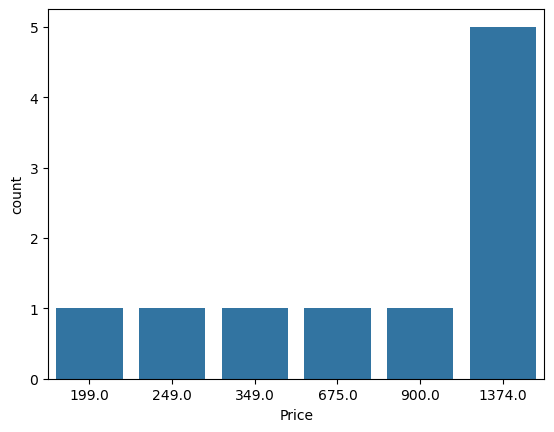

In [327]:
sns.countplot(x=df2['Price'].head(10))
plt.show()

In [329]:
df2[df2["Price"]==df2["Price"].min()] 

,Product,Brand,description,Price,Offer,Offer_price,Reviews,Free_coupon,Coupon
89,Miss Claire - Glimmersticks For Lips,Miss Claire,Glimmersticks For Lips,65.0,5,61,42768,No,No Gift
1209,Miss Claire - Glimmersticks For Lips,Miss Claire,Glimmersticks For Lips,65.0,5,61,42768,No,No Gift


In [331]:
df2

,Product,Brand,description,Price,Offer,Offer_price,Reviews,Free_coupon,Coupon
0,Maybelline New - York Super Stay Vinyl Ink Li...,Maybelline New,"York Super Stay Vinyl Ink Liquid Lipstick, In...",1374.0,0,1374,37910,Yes,No Gift
1,Nykaa Matte - To Last ! Transferproof Liquid ...,Nykaa Matte,To Last ! Transferproof Liquid Lipstick,675.0,20,540,77471,Yes,No Gift
2,Airy Velvet - Velvet Matte Lip Mousse,Airy Velvet,Velvet Matte Lip Mousse,900.0,20,720,9703,Yes,No Gift
3,C MACximal - Matte Lipstick,C MACximal,Matte Lipstick,1374.0,0,1374,8803,Yes,Free gift
4,Charlotte Tilbury - Matte Revolution,Charlotte Tilbury,Matte Revolution,1374.0,0,1374,4688,Yes,Free gift
...,...,...,...,...,...,...,...,...,...
3275,VitusFiz Glow - - L-glutathione With Collagen...,VitusFiz Glow,- L-glutathione With Collagen And Biotin Effer...,1374.0,0,1374,3,No,No Gift
3276,Star Struck - Wild Cherry 3 Piece Lip Kit(Int...,Star Struck,Wild Cherry 3 Piece Lip Kit(Intense Matte Lip ...,1374.0,0,1374,1,No,No Gift
3277,Booster And - Booster And Multivitamin Efferv...,Booster And,Booster And Multivitamin Effervescent Table...,1374.0,0,1374,5282,No,No Gift
3278,Half N - Half Matte Lip Cream Palette,Half N,Half Matte Lip Cream Palette,349.0,10,314,5282,No,No Gift


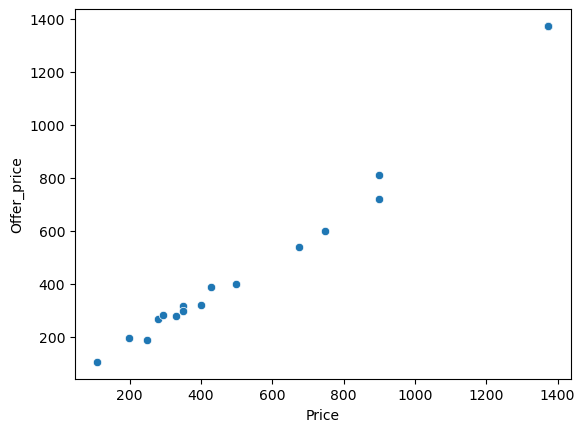

In [333]:
sns.scatterplot(data=df2.head(30),x="Price",y='Offer_price') 
plt.show()

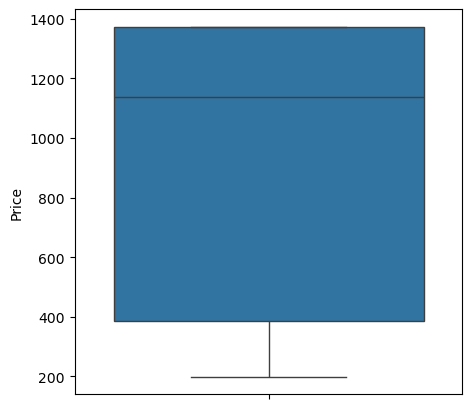

In [334]:
plt.figure(figsize=(5,5))
sns.boxplot(df2['Price'].head(20))
plt.show()

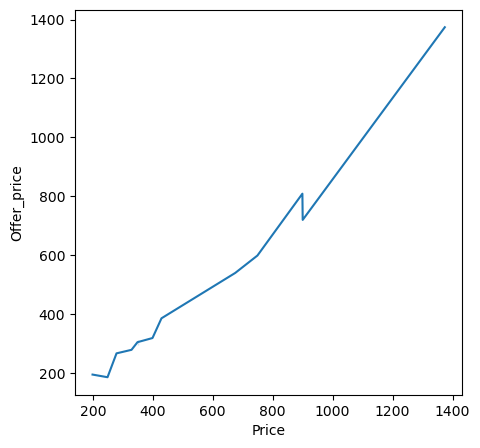

In [335]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df2.head(25),x="Price",y="Offer_price")
plt.show()

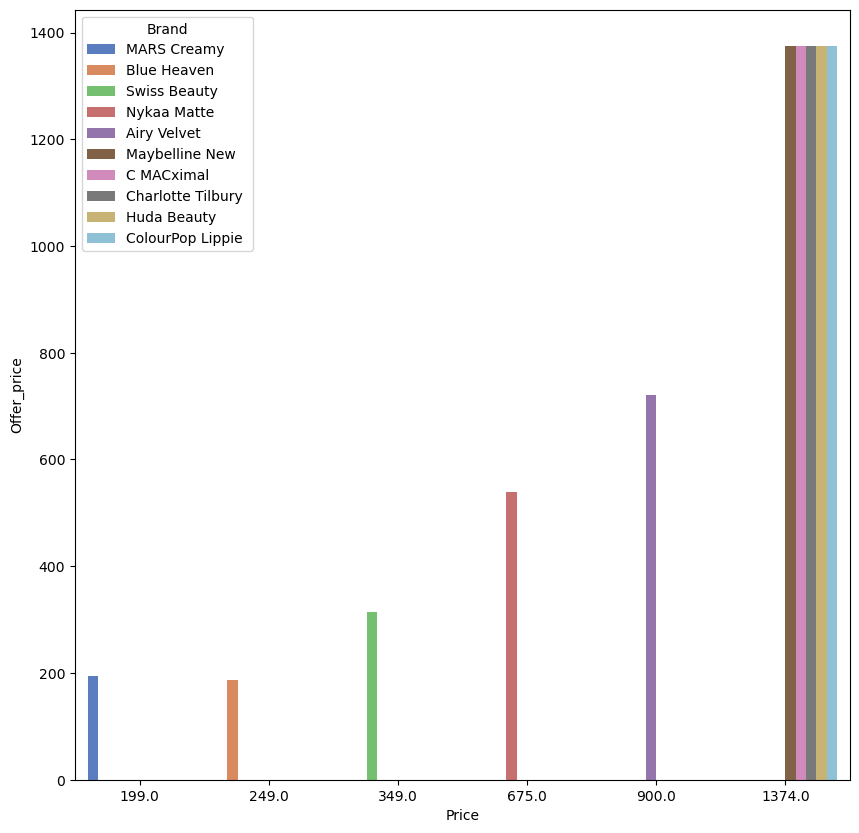

In [351]:
plt.figure(figsize=(10,10))
sns.barplot(data=df2.head(10),x='Price',y='Offer_price',hue='Brand', estimator='max',errorbar=None,palette="muted")
plt.show()

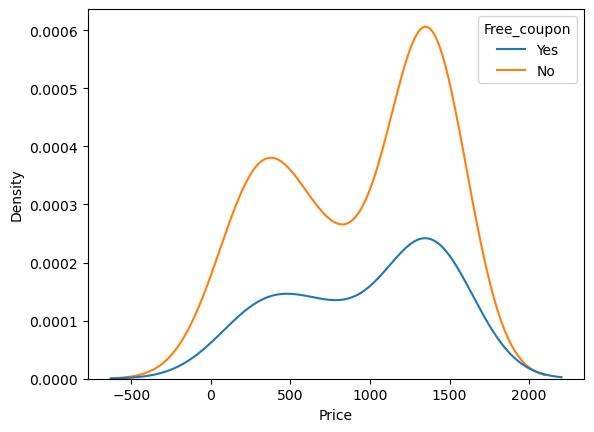

In [337]:
sns.kdeplot(data=df2.head(50), x='Price', hue='Free_coupon')
plt.show()


<Axes: >

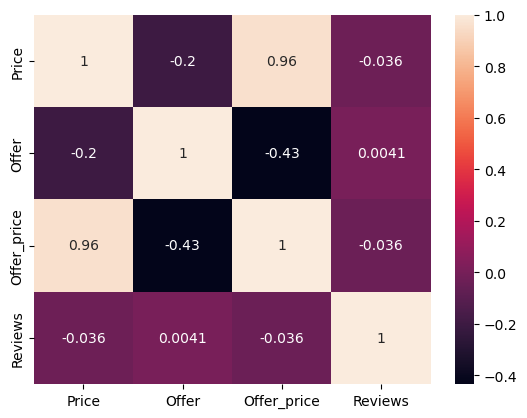

In [339]:
sns.heatmap(df2.corr(numeric_only=True),annot=True)

<Figure size 500x500 with 0 Axes>

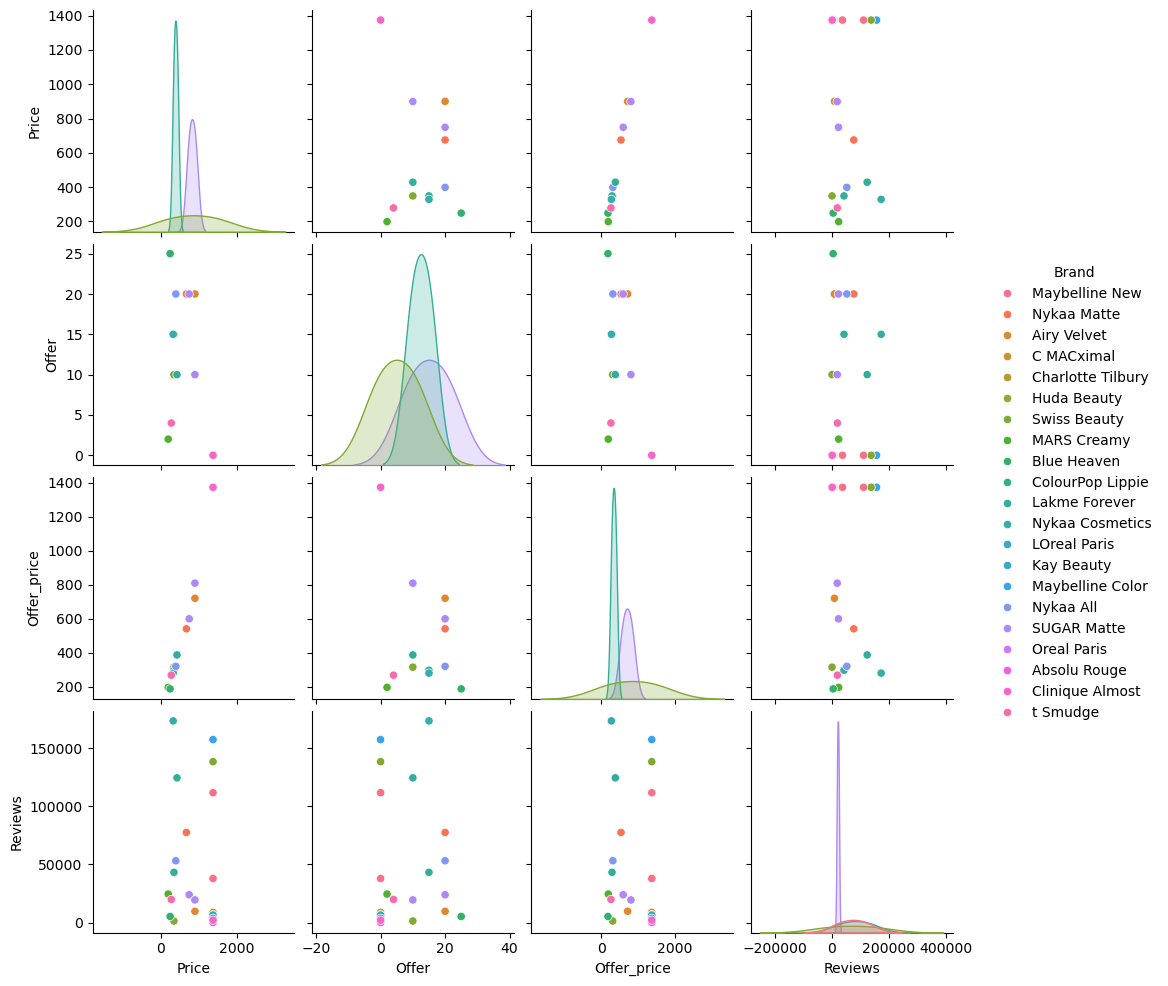

In [341]:
plt.figure(figsize=(5,5))
sns.pairplot(df2.head(25),hue='Brand')
plt.show()

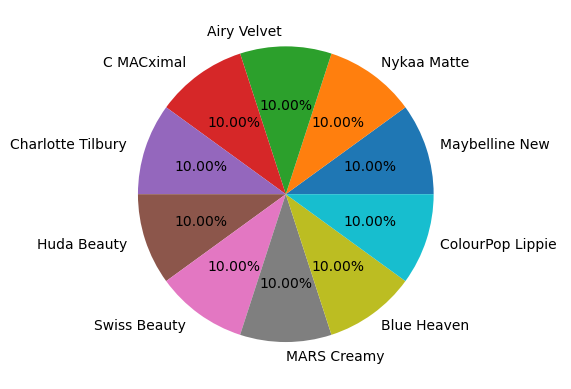

In [342]:
df2["Brand"].head(10).value_counts().plot.pie(autopct="%.2f%%")
plt.ylabel("")
plt.show()

# Interpretations

+ Following steps i followed in this project:

**Website name** : Nykaa

**Participants** : Chilukuri Vaishnavi

**1️. Data Collection**
+ Used requests to fetch the webpage content from Nykaa.
- Parsed HTML using BeautifulSoup to extract relevant information.
+ Used regular expressions for refining extracted data (e.g., extracting price values).

+ Extracted key columns: 'Product', 'Brand', 'Description', 'Price', 'Offer', 'Reviews', 'Free_coupon', 'Coupon'
- Stored the extracted data in a CSV file for further analysis.
  
**2. Data cleaning**
- Added 'Offer_price' column to the dataframe by using mathematical expressions
+ Converted Price, Offer_price, and Reviews into numeric format.
- Handled missing values and removed any duplicate entries.
+ Checked for inconsistencies in the dataset.
  
**3. Data Analysis**
> **Countplot**
+ Showed the frequency distribution of brands in the dataset.
- Helped identify which brands have more product listings.

> **Scatterplot**
+ Plotted Price vs Reviews to observe any correlation.
- Helped identify if expensive products get more reviews.

> **Boxplot**
+ Analyzed Price distributions across different brands.
- Identified outliers in the pricing of lipstick products.

> **Lineplot**
+ Tracked pricing trends for different brands.
- Helped understand how prices vary across brands.

> **Barplot**
+ Compared Offer Price vs Actual Price to visualize discounts.
- Used hue='Subcategory' to differentiate among lipstick types.

> **KDE Plot**
+ Showed the density distribution of product prices.
- Helped understand the most common price range.

> **Heatmap**
+ Displayed correlations between numeric variables.
- Helped analyze the relationship between Price, Offer_price, and Reviews.

> **Pairplot**
+ Showed pairwise relationships among numerical columns.
- Helped detect patterns and trends.

> **Pie Chart**
+ Visualized the proportion of the top 10 brands.
- Provided a clear percentage distribution of brands in the dataset.

# **Conclusion**
+ Successfully scraped, cleaned, and visualized data from Nykaa's lipstick page.
- Identified popular brands based on the number of listings.
+ Observed that discounted products tend to have more reviews.
- Price distribution varies significantly across different brands.
+ Some brands offer higher discounts compared to others.
- Certain products had high outliers, indicating premium pricing.
+ Data-driven insights can help customers find best-priced products and brands.

In [400]:
df2.columns

Index(['Product', 'Brand', 'description', 'Price', 'Offer', 'Offer_price',
       'Reviews', 'Free_coupon', 'Coupon'],
      dtype='object')